In [1]:
import numpy as np
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import PandasTools

c:\Users\lisa0\anaconda3\envs\LG_newmoses\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# SMILES to molecular structure

In [4]:
#smiles = pd.read_csv('../checkpoints/ZINC_vae_done/vae_generated.csv')
smiles = pd.read_csv('../../NewMoses_results/ZINC_vae_20240515/vae_generated.csv')
smiles.head()

,SMILES
0,O=C(c1ccccc1)N1CCC(NC(=O)c2ccc(Cl)cc2)C1
1,CCOc1ccc(Nc2nc(C)c(C(=O)NC)s2)cc1
2,CCOc1ccc2cc(C(=O)NCCN3CCCCCC3=O)oc2c1
3,O=C(Cc1nc(Cc2ccccc2)n[nH]1)Nc1ccc2c(c1)COC2
4,Cn1ncnc1CNC(=O)c1cnn(-c2ccc(F)cc2)c1C(F)F


In [5]:
smiles['ROMol'] = smiles['SMILES'].apply(Chem.MolFromSmiles)

[11:55:23] Can't kekulize mol.  Unkekulized atoms: 16 17 18
[11:55:23] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 16 17 18
[11:55:23] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 7
[11:55:23] SMILES Parse Error: unclosed ring for input: 'Cc1cc(C(=O)N2CC3CC(C(=O)NC4CC4C5C3)C(=O)N3C2CCC2)no1'
[11:55:23] SMILES Parse Error: unclosed ring for input: 'N#Cc1cccc(-c2cn3c(n2)N(C(=O)C2CCC2)CC(O)C2)c1'
[11:55:23] Can't kekulize mol.  Unkekulized atoms: 3 4 6 9 18
[11:55:23] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17
[11:55:23] SMILES Parse Error: unclosed ring for input: 'CC1CN(Cc2nc3sc4c(c3c(=O)n(C)c(=O)n3C)CCCC2)cs1'
[11:55:23] SMILES Parse Error: unclosed ring for input: 'COc1cccc(C(=O)N2CCC(O)(C3(C)C)CC2)c1F'
[11:55:23] SMILES Parse Error: extra close parentheses while parsing: CN(CCc1ccccn1)C(=O)CC#N)c1ccncc1
[11:55:23] SMILES Parse Error: Failed parsing SMILES 'CN(CCc1ccccn1)C(=O)CC#N)c1ccncc1' for input: 'CN(CCc1ccccn1)C(=O)CC#N)c1ccncc1'
[11:55:23] SMILES Parse Err

In [6]:
smiles.head()

,SMILES,ROMol
0,O=C(c1ccccc1)N1CCC(NC(=O)c2ccc(Cl)cc2)C1,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...
1,CCOc1ccc(Nc2nc(C)c(C(=O)NC)s2)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...
2,CCOc1ccc2cc(C(=O)NCCN3CCCCCC3=O)oc2c1,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...
3,O=C(Cc1nc(Cc2ccccc2)n[nH]1)Nc1ccc2c(c1)COC2,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...
4,Cn1ncnc1CNC(=O)c1cnn(-c2ccc(F)cc2)c1C(F)F,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...


c:\Users\lisa0\anaconda3\envs\LG_newmoses\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


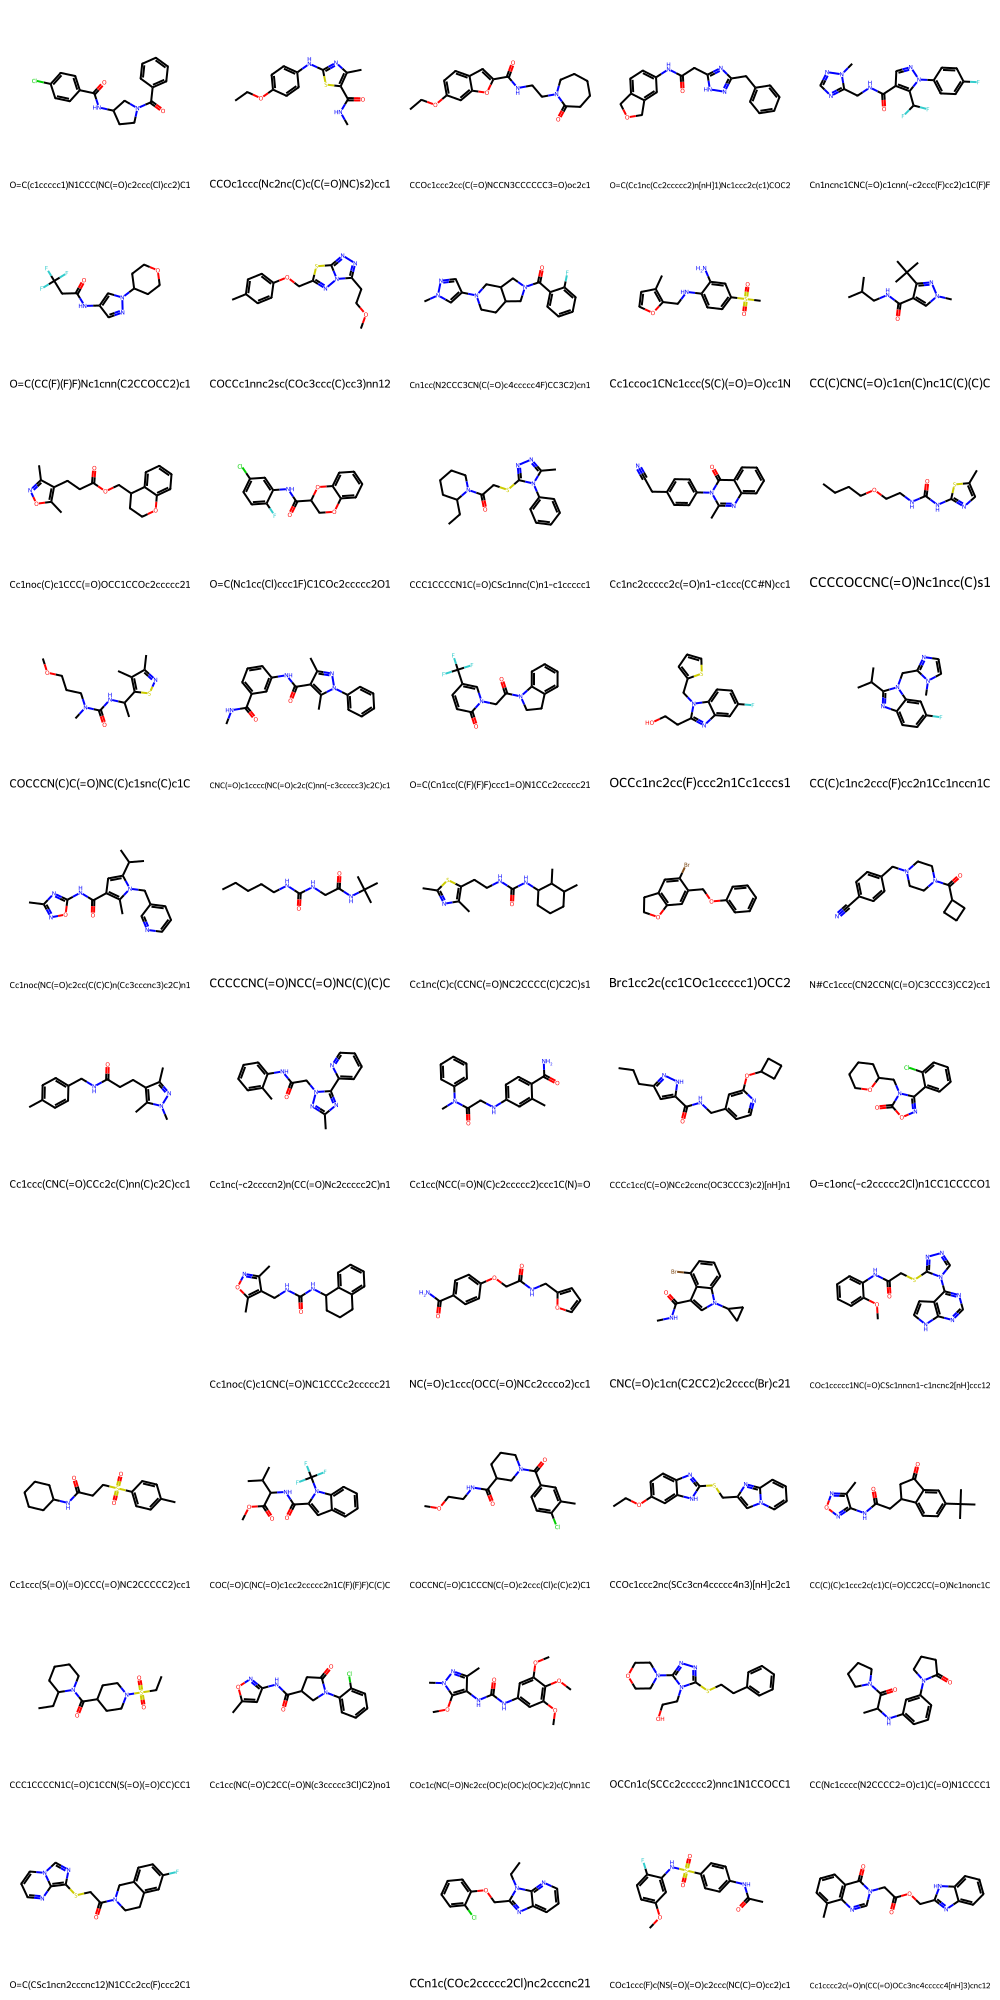

In [7]:
display(PandasTools.FrameToGridImage(smiles, column='ROMol', legendsCol='SMILES', molsPerRow=5))

In [8]:
smiles

,SMILES,ROMol
0,O=C(c1ccccc1)N1CCC(NC(=O)c2ccc(Cl)cc2)C1,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...
1,CCOc1ccc(Nc2nc(C)c(C(=O)NC)s2)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...
2,CCOc1ccc2cc(C(=O)NCCN3CCCCCC3=O)oc2c1,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...
3,O=C(Cc1nc(Cc2ccccc2)n[nH]1)Nc1ccc2c(c1)COC2,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...
4,Cn1ncnc1CNC(=O)c1cnn(-c2ccc(F)cc2)c1C(F)F,<rdkit.Chem.rdchem.Mol object at 0x0000017BBBA...
...,...,...
29995,CN(C)C(=O)c1cccc(NC(=O)COc2ccccc2C#N)c1,<rdkit.Chem.rdchem.Mol object at 0x0000017BD78...
29996,COc1ccc(Cl)c2c1CCNC2c1cccnc1C,<rdkit.Chem.rdchem.Mol object at 0x0000017BD78...
29997,CC1(NC(=O)c2cc(F)ccc2Br)Cc2ccccc2C1,<rdkit.Chem.rdchem.Mol object at 0x0000017BD78...
29998,CC(c1ccco1)N(C)C(=O)c1cc(Cl)c2c(c1)OCO2,<rdkit.Chem.rdchem.Mol object at 0x0000017BD78...


# Latent Space Visualization

## VAE model on ZINC dataset

In [9]:
import sys
sys.path.append("..")
import moses
from moses.vae import VAE
from moses.utils import CharVocab, StringDataset
from moses.vae.trainer import VAETrainer

from moses.metrics import QED
from moses.utils import get_mol

In [11]:
#config = torch.load('../checkpoints/ZINC_vae_done/vae_config.pt')
config = torch.load('../../NewMoses_results/ZINC_vae_20240515/vae_config.pt')

# vocab = torch.load('../checkpoints/ZINC_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

{'F', 'r', 'c', '1', '-', 'C', 'H', '2', '6', '3', '4', 'n', 'S', ']', 'N', '#', 's', 'O', 'l', 'o', '5', '[', ')', '=', 'B', '('}


In [12]:
#model_path = '../checkpoints/ZINC_vae_done/vae_model_080.pt'
model_path = '../../NewMoses_results/ZINC_vae_20240515/vae_model_080.pt'

model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

* sample size = 50,000

In [13]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train.shape[0], size, replace=False)
sample = train[rand_indices]

In [14]:
sample_mol = list(map(get_mol, sample))
sample_qed = list(map(QED, sample_mol))

In [15]:
trainer = VAETrainer(config)
sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

In [16]:
Z = []

for step, batch in enumerate(sample_loader):
    input_batch = tuple(data.to(model.device) for data in batch)
    z, _ = model.forward_encoder(input_batch)
    Z.extend(z.detach().cpu().numpy())
    
Z = np.array(Z)

### 1. PCA of latent space

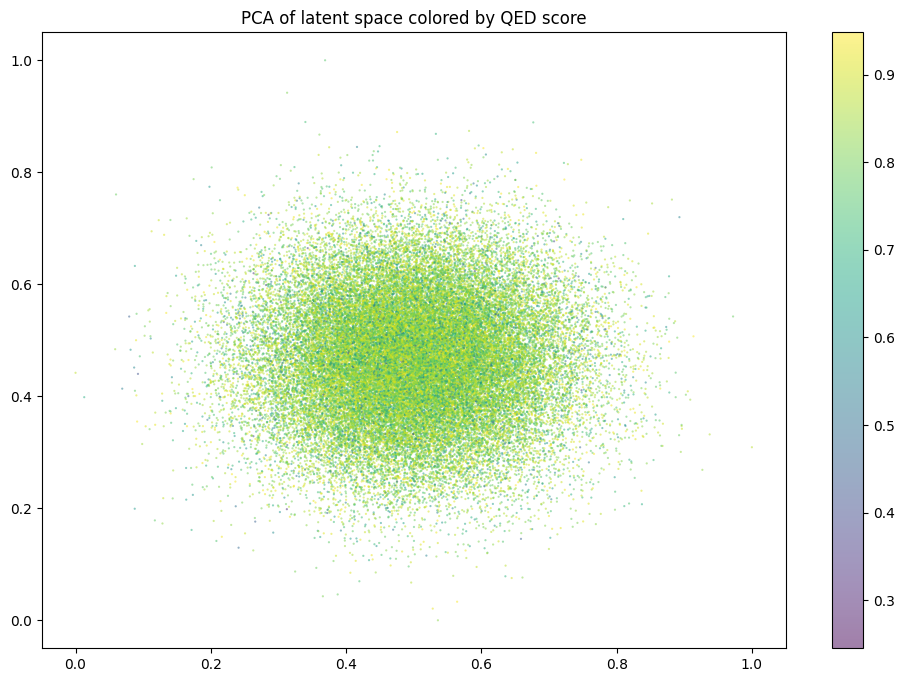

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('PCA of latent space colored by QED score')
plt.show()

### 2. T-SNE of latent space

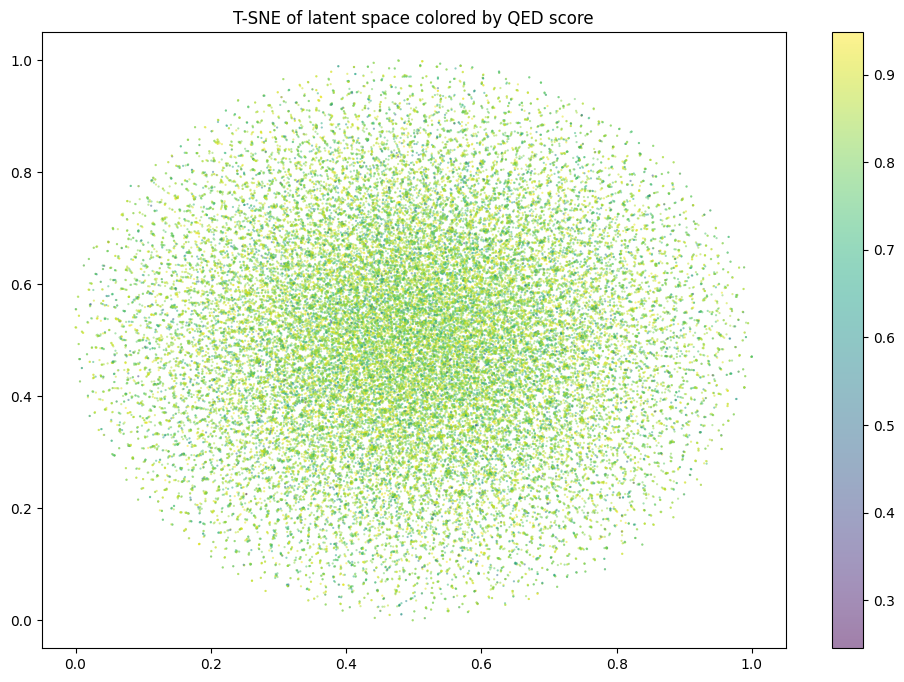

In [18]:
from sklearn.manifold import TSNE


Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

df = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('T-SNE of latent space colored by QED score')
plt.show()

## VAE model on QM9 dataset

In [155]:
config = torch.load('../checkpoints/QM9_vae_done/vae_config.pt')
# vocab = torch.load('../checkpoints/QM9_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

{']', '#', 'O', 'n', 'N', 'c', '1', '2', '4', '-', 'H', '[', 'F', '(', ')', '=', 'C', 'o', '5', '3'}


In [156]:
model_path = '../checkpoints/QM9_vae_done/vae_model_080.pt'
model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

* sample size = 50,000

In [157]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train.shape[0], size, replace=False)
sample = train[rand_indices]

In [160]:
sample_mol = list(map(get_mol, sample))
sample_qed = list(map(QED, sample_mol))

In [161]:
trainer = VAETrainer(config)
sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

In [162]:
Z = []

for step, batch in enumerate(sample_loader):
    input_batch = tuple(data.to(model.device) for data in batch)
    z, _ = model.forward_encoder(input_batch)
    Z.extend(z.detach().cpu().numpy())
    
Z = np.array(Z)

### 1. PCA of latent space

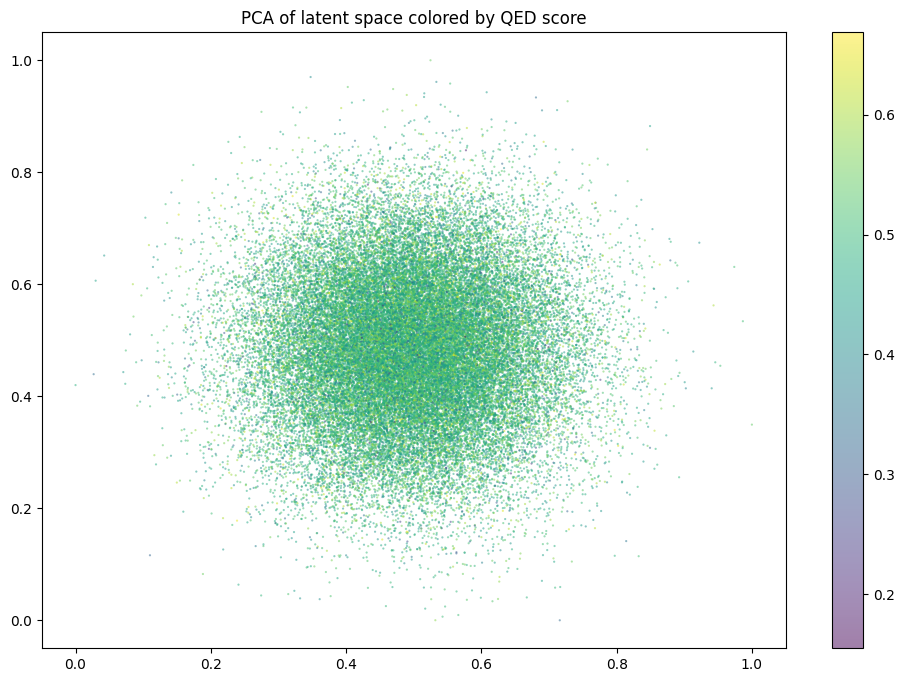

In [163]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('PCA of latent space colored by QED score')
plt.show()

### 2. T-SNE of latent space

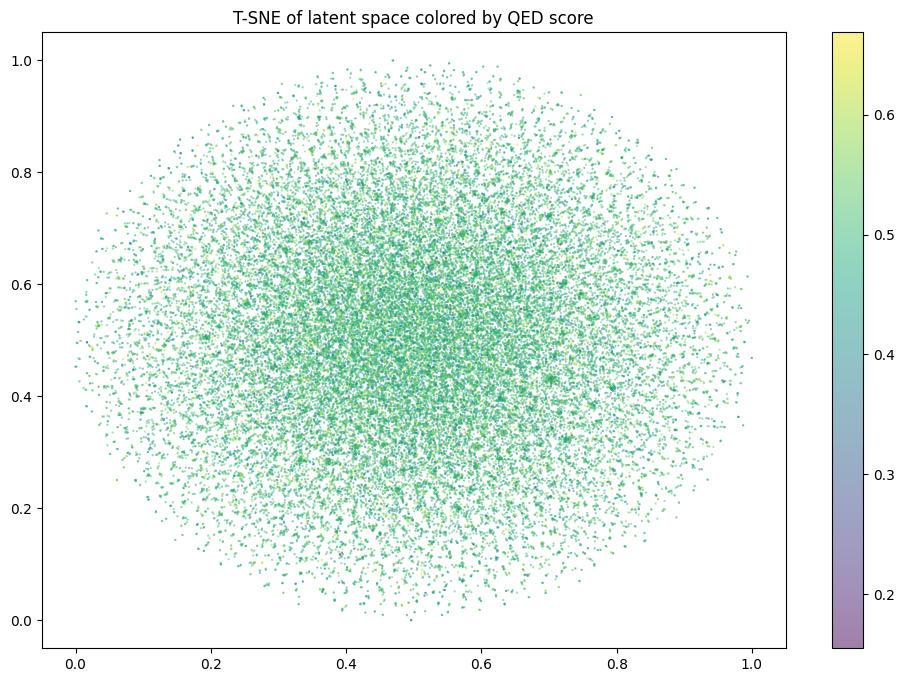

In [164]:
from sklearn.manifold import TSNE


Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

df = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('T-SNE of latent space colored by QED score')
plt.show()

# print interpolated molecule structure

In [20]:
traindata_path = '../moses/dataset/data/ZINC/train.csv'
train_molecule = pd.read_csv(traindata_path)
n = 100
selected_mol = train_molecule.sample(n=n)[['SMILES']]
#selected_gen['ROMol'] = selected_gen['SMILES'].apply(Chem.MolFromSmiles)
selected_mol = selected_mol.reset_index(drop=True)
selected_mol

,SMILES
0,CCC(=O)c1cccc(S(=O)(=O)Nc2ccc(F)cc2OC)c1
1,Cc1ncc2c(n1)CCN(C(=O)c1cccc(Cl)c1)C2
2,CNC(=O)c1ccc(OC)c(NC(=O)NCc2cccc(Cl)c2)c1
3,CC(=O)NC(CC(=O)Oc1cccc(F)c1)c1ccc(C)cc1
4,Cc1ccc(N2CC(C(=O)N3CCCC3)CC2=O)cc1C
...,...
95,COc1ccc(CNC(=O)Cn2ccc3ccccc32)cc1
96,Cc1ccc(O)c2c1C(C(=O)Cc1ccc(O)cc1)NCC2
97,CCCN(Cc1ccc(C#N)cc1)S(=O)(=O)c1c(C)nn(C)c1C
98,Cc1noc(C)c1CNC(=O)COc1cc(Cl)ccc1Cl


In [21]:
selected_smiles = np.array(selected_mol['SMILES'].tolist())


In [24]:
from torch.utils.data import DataLoader

selected_dataset = StringDataset(vocab, selected_smiles)
selected_dataloader = DataLoader(
    selected_dataset, batch_size=n,
    shuffle=True, collate_fn=selected_dataset.default_collate
)
for i, batch in enumerate(selected_dataloader):
    z, _ = model.forward_encoder(batch[0].T)
    if i == 0:
        Z = torch.empty((0, z.shape[1]))
    # do pca and normalize
    Z = torch.cat((Z, z), dim=0)
    
Z = Z.detach().numpy()

In [25]:
def lin_interp(x,y,t):
    '''
    x: starting point
    y: ending point
    t: interpolation parameter
    '''
    return t*x + (1-t)*y

In [26]:
def print_interp(i, j, n):
    '''
    i: index of the first molecule
    j: index of the second molecule
    n: number of interpolation points
    '''
    start = Z[i]
    end = Z[j]
    t_vals = np.linspace(0, 1, n)
    interps = [lin_interp(start, end, t) for t in t_vals]
    interps = np.array(interps)
    interps_torch = torch.from_numpy(interps)

    sampled = model.sample(n, z=interps_torch)

    sampled_df = pd.DataFrame(sampled, columns=['SMILES'])
    sampled_df['Romol'] = sampled_df['SMILES'].apply(Chem.MolFromSmiles)
    display(PandasTools.FrameToGridImage(sampled_df, column='Romol', legendsCol='SMILES', molsPerRow=4))

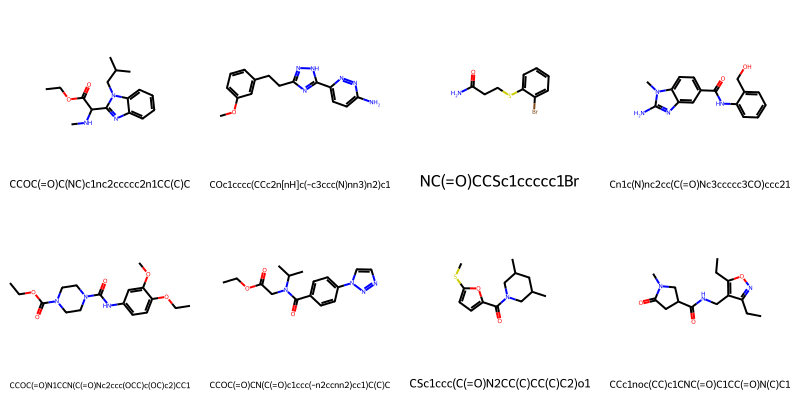

In [27]:
print_interp(2, 6, 8)